# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1715 non-null   object 
 1   STATE                         1715 non-null   object 
 2   YEAR                          1715 non-null   int64  
 3   ENROLL                        1224 non-null   float64
 4   TOTAL_REVENUE                 1275 non-null   float64
 5   FEDERAL_REVENUE               1275 non-null   float64
 6   STATE_REVENUE                 1275 non-null   float64
 7   LOCAL_REVENUE                 1275 non-null   float64
 8   TOTAL_EXPENDITURE             1275 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1275 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1275 non-null   float64
 11  OTHER_EXPENDITURE             1224 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1275 non-null   float64
 13  GRA

In [18]:
df.rename({
    'GRADES_PK_G' : 'ENROLL_PREK',
    'GRADES_KG_G' : 'ENROLL_KINDER',
    'GRADES_4_G' : 'ENROLL_4',
    'GRADES_8_G' : 'ENROLL_8',
    'GRADES_12_G' : 'ENROLL_12',
    'GRADES_1_8_G' : 'ENROLL_PRIMARY',
    'GRADES_9_12_G' : 'ENROLL_HS',
    'GRADES_ALL_G' : 'ENROLL_ALL',
    'ENROLL' : 'ENROLL_ALL_EST'
},
axis = 1, inplace=True)

In [19]:
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [20]:
df.dropna(subset=['AVG_READING_4_SCORE'], inplace=True)

In [21]:
df["ENROLL_ALL"].isna().sum()

np.int64(76)

In [22]:
(df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"]).describe()

count       438.000000
mean       5572.116438
std       18771.688566
min           0.000000
25%           0.000000
50%           0.000000
75%        1661.250000
max      156439.000000
dtype: float64

In [23]:
((df["ENROLL_ALL"]-df["ENROLL_PREK"]-df["ENROLL_KINDER"]-df["ENROLL_PRIMARY"]-df["ENROLL_HS"])/df["ENROLL_ALL"]*100).describe()

count    438.000000
mean       0.480138
std        1.165665
min        0.000000
25%        0.000000
50%        0.000000
75%        0.234742
max        7.702014
dtype: float64

In [24]:
df['ENROLL_ALL'] = df['ENROLL_ALL'].fillna(df["ENROLL_PREK"]+df["ENROLL_PRIMARY"]+df["ENROLL_HS"])

In [25]:
df["ENROLL_ALL"].isna().sum()

np.int64(76)

In [26]:
df[df["ENROLL_ALL"].isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK       False
ENROLL_PRIMARY    False
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [27]:
df[df.ENROLL_ALL_EST.isna()]["ENROLL_ALL"].notna().sum()

np.int64(93)

In [28]:
((df["ENROLL_ALL"] - df["ENROLL_ALL_EST"])/df["ENROLL_ALL"]).describe()

count    481.000000
mean       0.027597
std        0.054886
min       -0.096404
25%        0.004437
50%        0.014650
75%        0.031764
max        0.450693
dtype: float64

In [29]:
df["ENROLL_ALL_EST"] = df["ENROLL_ALL_EST"].fillna(df["ENROLL_ALL"])

In [30]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE']

In [32]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'ENROLL_PREK', 'ENROLL_KINDER',
       'ENROLL_4', 'ENROLL_8', 'ENROLL_12', 'ENROLL_PRIMARY', 'ENROLL_HS',
       'ENROLL_ALL', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'],
      dtype='object')

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Reading*

How many years of data are logged in our dataset? 

In [33]:
# @@@ 1
# Your Code
num_years = df['YEAR'].nunique()
print("Number of unique years:", num_years)


Number of unique years: 14


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [34]:
# @@@ 2
mi_oh = (
    df[df['STATE'].isin(['MICHIGAN', 'OHIO'])]
    .groupby('STATE')['AVG_READING_4_SCORE']
    .mean()
)
print(mi_oh)
higher_state = mi_oh.idxmax()
print(f"{higher_state} has the higher average Grade 4 Reading score.")

STATE
MICHIGAN    217.833333
OHIO        223.181818
Name: AVG_READING_4_SCORE, dtype: float64
OHIO has the higher average Grade 4 Reading score.


Find the average for your chosen test across all states in 2019

In [35]:
# @@@ 3
avg_2019 = (
    df[df['YEAR'] == 2019]['AVG_READING_4_SCORE']
    .mean()
)
print("Average Grade 4 Reading score in 2019:", avg_2019)


Average Grade 4 Reading score in 2019: 219.79245283018867


For each state, find a maximum value for your chosen test score

In [36]:
# @@@ 4
max_by_state = (
    df.groupby('STATE')['AVG_READING_4_SCORE']
    .max()
)
print(max_by_state)

STATE
ALABAMA                 220.0
ALASKA                  214.0
ARIZONA                 216.0
ARKANSAS                219.0
CALIFORNIA              216.0
COLORADO                227.0
CONNECTICUT             230.0
DELAWARE                226.0
DISTRICT_OF_COLUMBIA    214.0
DODEA                   235.0
FLORIDA                 228.0
GEORGIA                 222.0
HAWAII                  218.0
IDAHO                   223.0
ILLINOIS                222.0
INDIANA                 227.0
IOWA                    225.0
KANSAS                  225.0
KENTUCKY                228.0
LOUISIANA               216.0
MAINE                   228.0
MARYLAND                232.0
MASSACHUSETTS           237.0
MICHIGAN                220.0
MINNESOTA               227.0
MISSISSIPPI             219.0
MISSOURI                224.0
MONTANA                 227.0
NATIONAL                223.0
NEBRASKA                227.0
NEVADA                  218.0
NEW_HAMPSHIRE           232.0
NEW_JERSEY              233.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [37]:
# @@@ 5
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL_ALL']
df['STATE_REVENUE_PER_STUDENT'] = df['STATE_REVENUE'] / df['ENROLL_ALL']
df['LOCAL_REVENUE_PER_STUDENT'] = df['LOCAL_REVENUE'] / df['ENROLL_ALL']
df['FEDERAL_REVENUE_PER_STUDENT'] = df['FEDERAL_REVENUE'] / df['ENROLL_ALL']

df['INSTRUCTION_EXPEND_RATIO'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']

Feature engineering justification: **<It is better to look at revenue and expenditure at an individual level as that gives us a better look into how much resources are available for each child and if money spent per child is somehow correlated with different attributes.\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

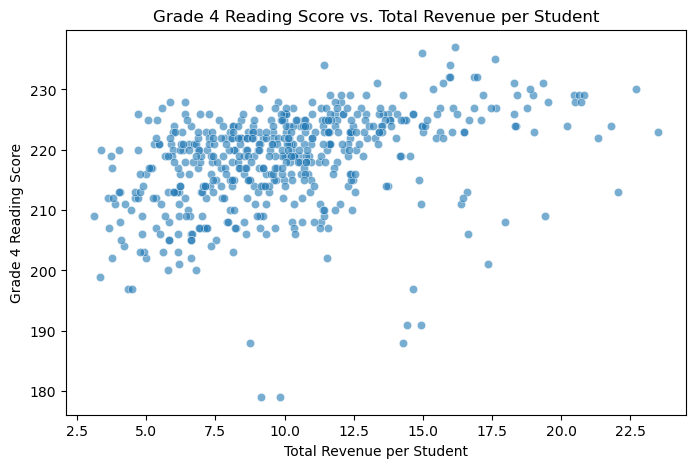

In [38]:
# @@@ 6
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.scatterplot(x='TOTAL_REVENUE_PER_STUDENT', y='AVG_READING_4_SCORE', data=df, alpha=0.6)
plt.xlabel('Total Revenue per Student')
plt.ylabel('Grade 4 Reading Score')
plt.title('Grade 4 Reading Score vs. Total Revenue per Student')
plt.show()


**Reading Score VS Total Revenue per Student** This graph has a general upward trend and it can be suggested that higher funding per student does help boost reading scores.

**Visualization 2**

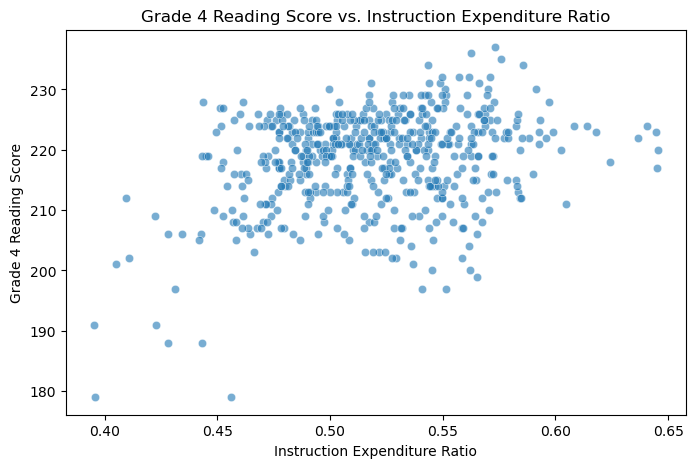

In [39]:
# @@@ 7
plt.figure(figsize=(8,5))
sns.scatterplot(x='INSTRUCTION_EXPEND_RATIO', y='AVG_READING_4_SCORE', data=df, alpha=0.6)
plt.xlabel('Instruction Expenditure Ratio')
plt.ylabel('Grade 4 Reading Score')
plt.title('Grade 4 Reading Score vs. Instruction Expenditure Ratio')
plt.show()


**Reading Score VS Instruction Expenditure per Student** The two factors are not really correlated. Though the graph suggests investing greater share of resources in instruction might help but other factors are also responsible in reading outcome.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [42]:
from sklearn.model_selection import train_test_split

In [57]:
# @@@ 8
features = ['TOTAL_REVENUE_PER_STUDENT', 'STATE_REVENUE_PER_STUDENT', 'LOCAL_REVENUE_PER_STUDENT', 'SUPPORT_SERVICES_EXPENDITURE', 'FEDERAL_REVENUE_PER_STUDENT', 'INSTRUCTION_EXPEND_RATIO', 'ENROLL_ALL']
X = df[features]
y = df['AVG_READING_4_SCORE']
X = X.dropna()
y = y.loc[X.index]

In [58]:
# @@@ 9 

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [59]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [60]:
# @@@ 11
# create your model here
model = LinearRegression()

In [61]:
model.fit(X_train, y_train)

LinearRegression()

In [62]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [63]:
# @@@ 12
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 45.290103611666034
R^2 Score: 0.303383735799602


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

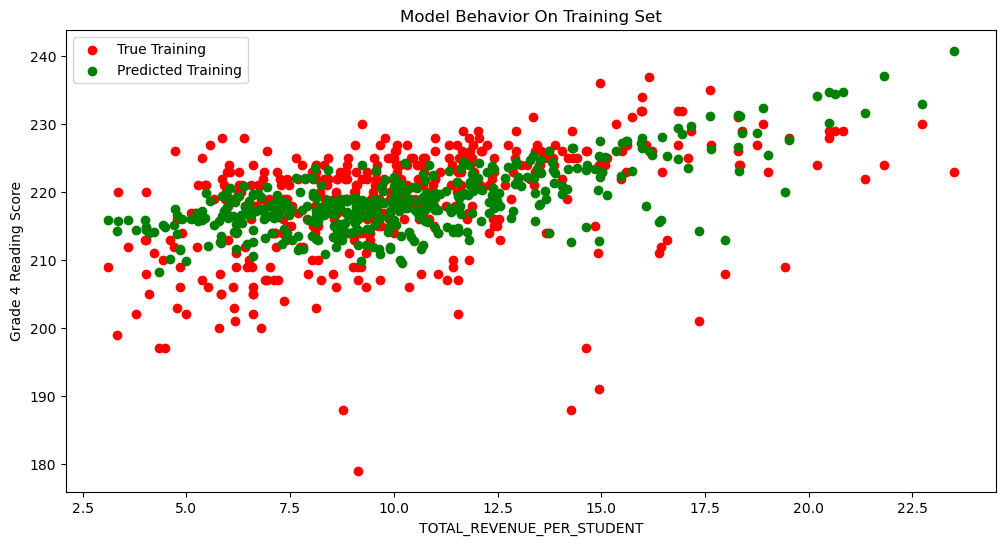

In [64]:
# @@@ 13

col_name = 'TOTAL_REVENUE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

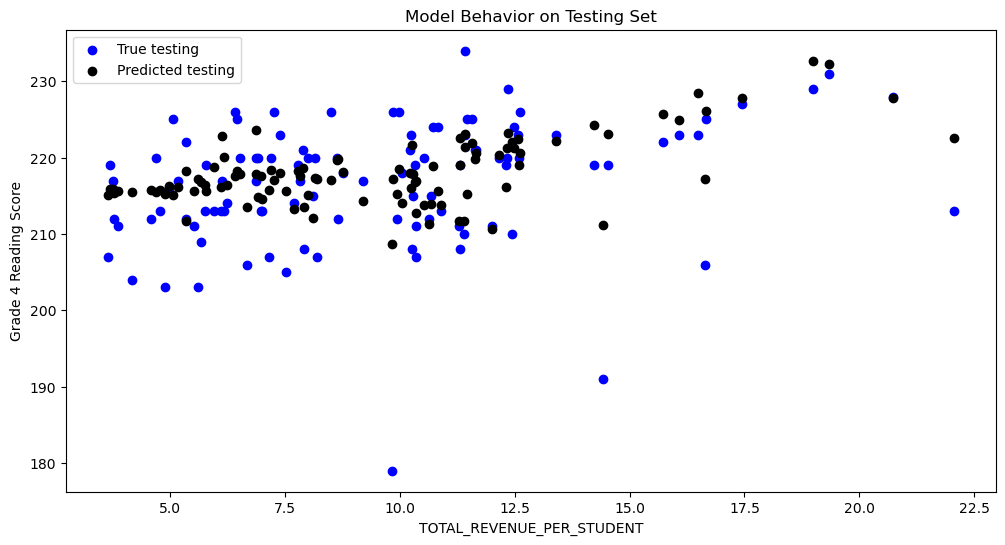

In [65]:
# @@@ 14


col_name = 'TOTAL_REVENUE_PER_STUDENT'


f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Reading Score')
plt.title("Model Behavior on Testing Set")